
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Amirabbas Afzali

____

# Personal Data

In [ ]:
# Set your student number
student_number = '400101861'
Name = 'ahmadreza'
Last_Name = 'majlesara'

# Rules
- Make sure that all of your cells can be run perfectly.
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens.
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


Load `gpt2` model:

### section 1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model
import torch
from torch import nn


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
basemodel = GPT2LMHeadModel.from_pretrained("gpt2").to("cuda")

Load `sst-2` dataset:

### section 2

go ahead:

In [ ]:
inputs = [
    "The future of AI is",
    "Once upon a time, in a faraway land,",
    "The key to success is",
    "The best way to learn is",
    "In a world where technology dominates,",
    "The mysteries of the universe lie",
    "Happiness is a journey",
    "The most important lesson I've learned is",
    "Innovation in science begins with",
    "The challenges of climate change are"
]

generation_params = {
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "top_p": 0.9,
    "repetition_penalty": 1.2,
    "num_beams": 1,
    "no_repeat_ngram_size": 2,
}

outputs = []
for input_text in inputs:
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to("cuda")

    output = model.generate(
        input_ids,
        max_length=generation_params["max_length"],
        temperature=generation_params["temperature"],
        top_k=generation_params["top_k"],
        top_p=generation_params["top_p"],
        repetition_penalty=generation_params["repetition_penalty"],
        num_beams=generation_params["num_beams"],
        no_repeat_ngram_size=generation_params["no_repeat_ngram_size"]
    )

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    outputs.append((input_text, generated_text))

for i, (prompt, generated) in enumerate(outputs):
    print(f"Prompt {i+1}: {prompt}")
    print(f"Generated: {generated}\n")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Prompt 1: The future of AI is
Generated: The future of AI is uncertain. The question now becomes whether we can make it work in a way that makes sense to humans, or if the technology will be too complex and difficult to understand for us all."
- Michael Krieger

Prompt 2: Once upon a time, in a faraway land,
Generated: Once upon a time, in a faraway land, the world was made for men.
The first man to be born into this earth had been called "the son of God." He lived as an angel from heaven and became known by his name

Prompt 3: The key to success is
Generated: The key to success is not just the ability of a team, but also how well they can adapt.
"We have got some good players in our squad and we are looking forward," he said after his side's 2-1 win over Manchester

Prompt 4: The best way to learn is
Generated: The best way to learn is by doing it yourself.
I've been working on this for a while now, and I'm really excited about the possibilities of using my own skills in order not onl

The key configurations in text generation significantly impact the style and coherence of outputs.

**Temperature** controls randomness: high values (e.g., 1.0) make outputs diverse but less coherent, while low values (e.g., 0.2) make them deterministic but repetitive.

**Top-k sampling** limits choices to the top `k` words; lower values (e.g., 10) are focused but less creative, while higher values (e.g., 50) add diversity at the risk of incoherence.

**Top-p sampling** selects words based on cumulative probability. Lower `p` (e.g., 0.7) keeps outputs conservative, while higher `p` (e.g., 0.9) increases diversity.

**Repetition penalty** discourages repeated words, with higher values (e.g., 2.0) reducing repetition but possibly affecting fluency.

**Num beams** in beam search balances diversity and speed; more beams (e.g., 5) enhance coherence but slow down generation.

**No repeat n-gram size** prevents repeated phrases, with higher values (e.g., 3) ensuring diversity but potentially reducing coherence.

### section 3

In [5]:
from datasets import load_dataset
from transformers import GPT2Tokenizer
from torch.utils.data import DataLoader

dataset = load_dataset("glue", "sst2")

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

def preprocess_function(examples):
    tokenized_inputs = tokenizer(
        examples["sentence"], truncation=True, max_length=128, padding="max_length"
    )
    # Ensure labels are valid (0 for negative, 1 for positive)
    tokenized_inputs["label"] = [
        label if label in [0, 1] else 0 for label in examples["label"]
    ]
    return tokenized_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True, remove_columns=["sentence", "idx"])
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

train_dataloader = DataLoader(tokenized_datasets["train"], batch_size=16, shuffle=True)
validation_dataloader = DataLoader(tokenized_datasets["validation"], batch_size=16)
test_dataloader = DataLoader(tokenized_datasets["test"], batch_size=16)

batch = next(iter(train_dataloader))
print("Sample Batch from Train DataLoader:")
print({key: value.shape for key, value in batch.items()})


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Sample Batch from Train DataLoader:
{'label': torch.Size([16]), 'input_ids': torch.Size([16, 128]), 'attention_mask': torch.Size([16, 128])}


### section 4

In [ ]:
test_input = "This is a test sentence."

inputs = tokenizer(test_input, return_tensors="pt", padding=True, truncation=True, max_length=128).to("cuda")

outputs = model.transformer(**inputs)

cls_token_embedding = outputs.last_hidden_state[:, 0, :]

print(f"CLS token embedding shape: {cls_token_embedding.shape}")


CLS token embedding shape: torch.Size([1, 768])


Trainable Parameters:
transformer.h.11.ln_1.weight: torch.Size([768])
transformer.h.11.ln_1.bias: torch.Size([768])
transformer.h.11.attn.c_attn.weight: torch.Size([768, 2304])
transformer.h.11.attn.c_attn.bias: torch.Size([2304])
transformer.h.11.attn.c_proj.weight: torch.Size([768, 768])
transformer.h.11.attn.c_proj.bias: torch.Size([768])
transformer.h.11.ln_2.weight: torch.Size([768])
transformer.h.11.ln_2.bias: torch.Size([768])
transformer.h.11.mlp.c_fc.weight: torch.Size([768, 3072])
transformer.h.11.mlp.c_fc.bias: torch.Size([3072])
transformer.h.11.mlp.c_proj.weight: torch.Size([3072, 768])
transformer.h.11.mlp.c_proj.bias: torch.Size([768])
transformer.ln_f.weight: torch.Size([768])
transformer.ln_f.bias: torch.Size([768])
Epoch 1/3, Train Loss: 3.2741, Train Accuracy: 0.4201, Val Loss: 0.7575, Val Accuracy: 0.5092
Epoch 2/3, Train Loss: 0.6781, Train Accuracy: 0.5710, Val Loss: 0.6802, Val Accuracy: 0.5505
Epoch 3/3, Train Loss: 0.6702, Train Accuracy: 0.5820, Val Loss: 0.67

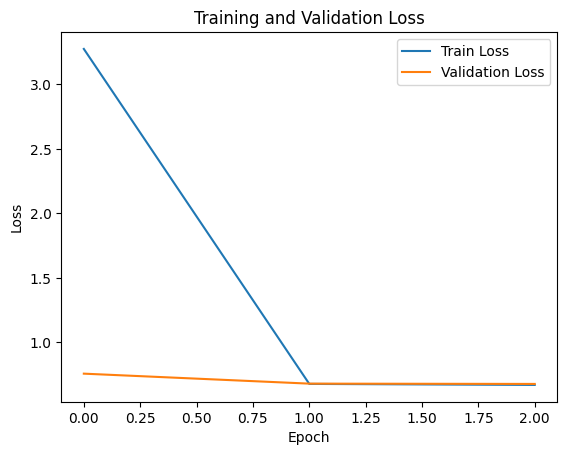

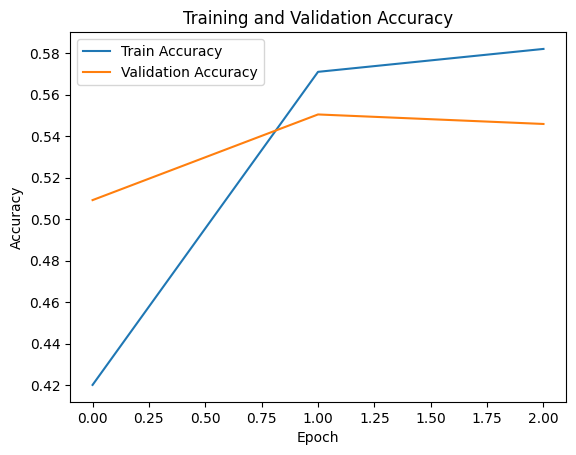

In [ ]:
import torch
from torch import nn, optim
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = basemodel.to(device)

for name, param in model.named_parameters():
    if "transformer.h" in name:
        if not name.startswith(f"transformer.h.{model.config.n_layer - 1}"):
            param.requires_grad = False
    elif "wte" in name or "wpe" in name:
        param.requires_grad = False
    elif "ln_f" in name:
        param.requires_grad = True


print("Trainable Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=5e-5)

def train(model, train_dataloader, validation_dataloader, epochs=3):
    model.train()

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        total_loss = 0
        all_train_labels = []
        all_train_predictions = []

        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)

            outputs = model.transformer(input_ids=input_ids, attention_mask=attention_mask)
            hidden_states = outputs.last_hidden_state[:, 0, :]
            logits = hidden_states

            loss = criterion(logits, labels)
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predictions = torch.argmax(logits, dim=-1)
            all_train_labels.extend(labels.cpu().numpy())
            all_train_predictions.extend(predictions.cpu().numpy())

        train_accuracy = accuracy_score(all_train_labels, all_train_predictions)
        train_losses.append(total_loss / len(train_dataloader))
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate(model, validation_dataloader)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, train_accuracies, val_losses, val_accuracies

def evaluate(model, dataloader):
    model.eval()

    total_loss = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)

            outputs = model.transformer(input_ids=input_ids, attention_mask=attention_mask)
            hidden_states = outputs.last_hidden_state[:, 0, :]
            logits = hidden_states

            loss = criterion(logits, labels)
            total_loss += loss.item()

            predictions = torch.argmax(logits, dim=-1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    return total_loss / len(dataloader), accuracy

train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, validation_dataloader, epochs=3)

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


Validation Accuracy: 0.5459


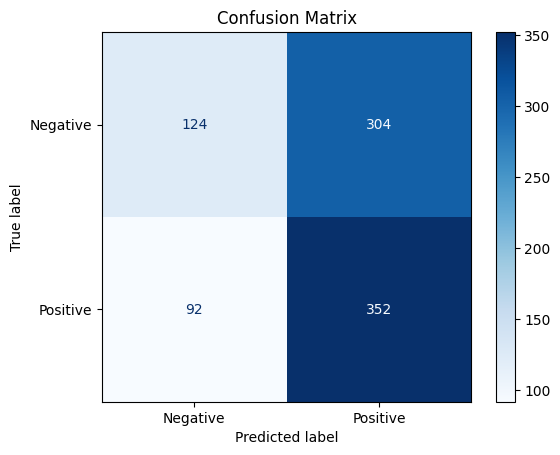

In [ ]:
all_labels = []
all_predictions = []

model.eval()
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        # Forward pass
        outputs = model.transformer(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state[:, 0, :]  # CLS token embedding
        logits = hidden_states

        # Predictions
        predictions = torch.argmax(logits, dim=-1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Compute accuracy
validation_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### section 5

In [ ]:
class ModifiedGPT2ForClassification(nn.Module):
    def __init__(self, base_model, input_dim, output_dim):
        super(ModifiedGPT2ForClassification, self).__init__()
        self.base_model = base_model
        self.linear = nn.Linear(input_dim, output_dim)

        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model.transformer(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state[:, 0, :]

        logits = self.linear(hidden_states)
        return logits


In [ ]:
input_dim = model.config.hidden_size
output_dim = 2

modified_model = ModifiedGPT2ForClassification(basemodel, input_dim, output_dim).to(device)

print("Trainable Parameters in Modified Model:")
for name, param in modified_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")

Trainable Parameters in Modified Model:
linear.weight: torch.Size([2, 768])
linear.bias: torch.Size([2])


In [ ]:
def train(model, train_dataloader, validation_dataloader, epochs=3):
    model.train()

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        total_loss = 0
        all_train_labels = []
        all_train_predictions = []

        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask)

            loss = criterion(logits, labels)
            total_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predictions = torch.argmax(logits, dim=-1)
            all_train_labels.extend(labels.cpu().numpy())
            all_train_predictions.extend(predictions.cpu().numpy())

        train_accuracy = accuracy_score(all_train_labels, all_train_predictions)
        train_losses.append(total_loss / len(train_dataloader))
        train_accuracies.append(train_accuracy)

        val_loss, val_accuracy = evaluate(model, validation_dataloader)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return train_losses, train_accuracies, val_losses, val_accuracies


In [ ]:
def evaluate(model, dataloader):
    model.eval()

    total_loss = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["label"].to(device)

            # Forward pass
            logits = model(input_ids=input_ids, attention_mask=attention_mask)

            # Compute loss
            loss = criterion(logits, labels)
            total_loss += loss.item()

            # Predictions
            predictions = torch.argmax(logits, dim=-1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    return total_loss / len(dataloader), accuracy


Epoch 1/3, Train Loss: 0.7054, Train Accuracy: 0.5432, Val Loss: 0.6946, Val Accuracy: 0.5092
Epoch 2/3, Train Loss: 0.6762, Train Accuracy: 0.5689, Val Loss: 0.6888, Val Accuracy: 0.5183
Epoch 3/3, Train Loss: 0.6708, Train Accuracy: 0.5820, Val Loss: 0.6810, Val Accuracy: 0.5356


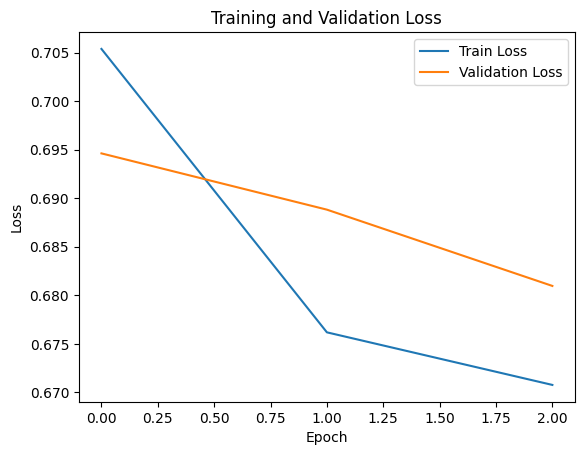

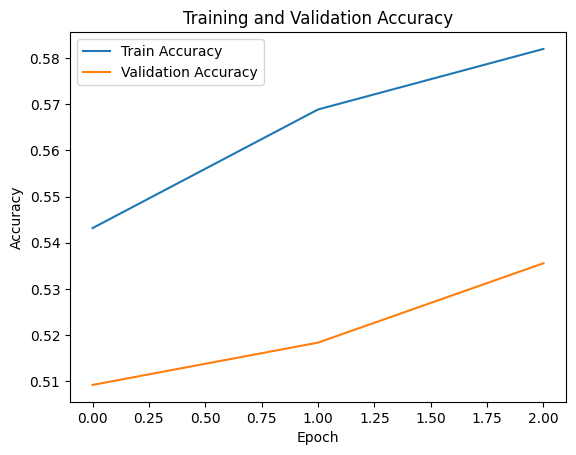

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, modified_model.parameters()), lr=5e-5)

train_losses, train_accuracies, val_losses, val_accuracies = train(modified_model, train_dataloader, validation_dataloader, epochs=3)

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

Validation Accuracy: 0.5356


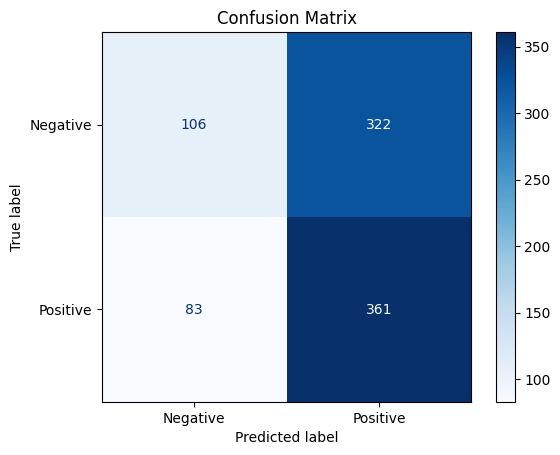

In [ ]:
all_labels = []
all_predictions = []

model.eval()
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        logits = modified_model(input_ids=input_ids, attention_mask=attention_mask)

        predictions = torch.argmax(logits, dim=-1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

validation_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

conf_matrix = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import torch.nn as nn
import torch

class ModifiedGPT2WithAttention(nn.Module):
    def __init__(self, base_model, input_dim, num_heads, output_dim):
        super(ModifiedGPT2WithAttention, self).__init__()
        self.base_model = base_model

        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, batch_first=True)

        self.linear = nn.Linear(input_dim, output_dim)

        for param in self.base_model.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model.transformer(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state

        attn_output, _ = self.attention(hidden_states, hidden_states, hidden_states, key_padding_mask=(~attention_mask.bool()))
        cls_token_embedding = attn_output[:, 0, :]

        logits = self.linear(cls_token_embedding)
        return logits


In [ ]:
input_dim = model.config.hidden_size
num_heads = 12
output_dim = 2

modified_model_with_attention = ModifiedGPT2WithAttention(basemodel, input_dim, num_heads, output_dim).to(device)

print("Trainable Parameters in Modified Model:")
for name, param in modified_model_with_attention.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")

Trainable Parameters in Modified Model:
attention.in_proj_weight: torch.Size([2304, 768])
attention.in_proj_bias: torch.Size([2304])
attention.out_proj.weight: torch.Size([768, 768])
attention.out_proj.bias: torch.Size([768])
linear.weight: torch.Size([2, 768])
linear.bias: torch.Size([2])


Epoch 1/3, Train Loss: 0.4951, Train Accuracy: 0.7529, Val Loss: 0.3395, Val Accuracy: 0.8612
Epoch 2/3, Train Loss: 0.3282, Train Accuracy: 0.8582, Val Loss: 0.3543, Val Accuracy: 0.8555
Epoch 3/3, Train Loss: 0.2907, Train Accuracy: 0.8757, Val Loss: 0.3435, Val Accuracy: 0.8727


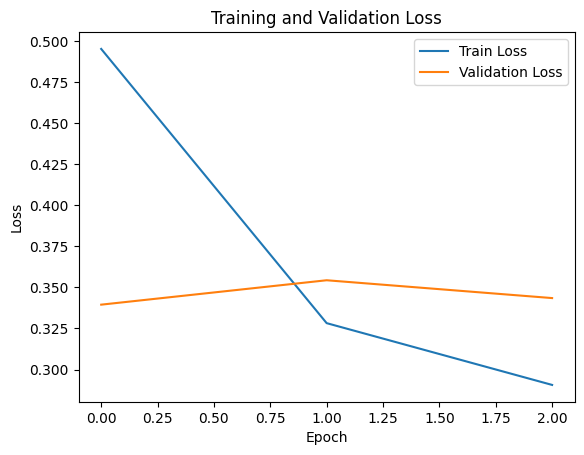

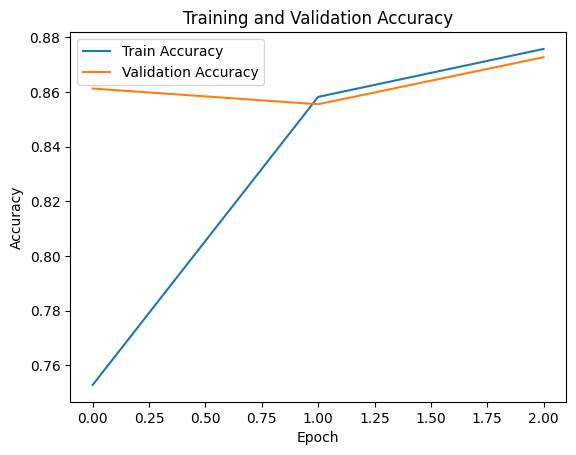

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, modified_model_with_attention.parameters()), lr=5e-5)

train_losses, train_accuracies, val_losses, val_accuracies = train(modified_model_with_attention, train_dataloader, validation_dataloader, epochs=3)

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


Validation Accuracy: 0.8727


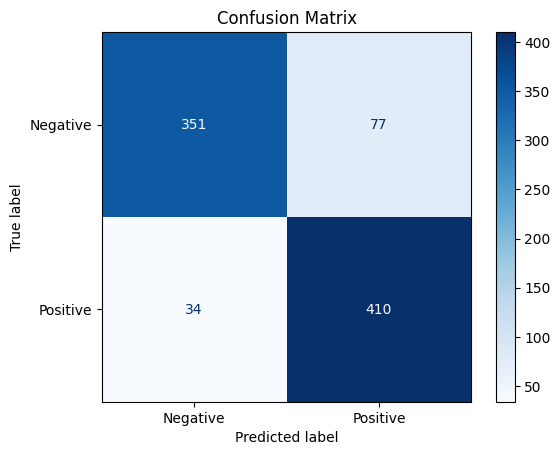

In [ ]:
all_labels = []
all_predictions = []

modified_model_with_attention.eval()
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        logits = modified_model_with_attention(input_ids=input_ids, attention_mask=attention_mask)

        predictions = torch.argmax(logits, dim=-1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

validation_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

conf_matrix = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import torch
import torch.nn as nn

class UnidirectionalGPT2ForClassification(nn.Module):
    def __init__(self, model, direction="left-to-right"):
        super(UnidirectionalGPT2ForClassification, self).__init__()
        self.gpt2 = model.transformer
        self.direction = direction
        self.unidirectional_layer = nn.Linear(model.config.n_embd, model.config.n_embd)
        self.classifier = nn.Linear(model.config.n_embd, 2)

    def forward(self, input_ids, attention_mask):
        outputs = self.gpt2(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state

        seq_len = embeddings.size(1)
        batch_size = embeddings.size(0)

        if self.direction == "left-to-right":
            unidirectional_mask = (
                torch.tril(torch.ones(seq_len, seq_len))
                .to(embeddings.device)
                .unsqueeze(0)
                .expand(batch_size, -1, -1)
            )
        elif self.direction == "right-to-left":
            unidirectional_mask = (
                torch.triu(torch.ones(seq_len, seq_len))
                .to(embeddings.device)
                .unsqueeze(0)
                .expand(batch_size, -1, -1)
            )
        else:
            raise ValueError("Invalid direction. Choose 'left-to-right' or 'right-to-left'.")

        unidirectional_output = torch.bmm(unidirectional_mask, embeddings)

        unidirectional_output = self.unidirectional_layer(unidirectional_output)

        cls_token_output = unidirectional_output[:, 0, :]
        logits = self.classifier(cls_token_output)

        return logits


In [ ]:
right_to_left_model = UnidirectionalGPT2ForClassification(model, direction="right-to-left").to(device)

print("Trainable Parameters in Right-to-Left Model:")
for name, param in right_to_left_model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")


Trainable Parameters in Right-to-Left Model:
gpt2.h.11.ln_1.weight: torch.Size([768])
gpt2.h.11.ln_1.bias: torch.Size([768])
gpt2.h.11.attn.c_attn.weight: torch.Size([768, 2304])
gpt2.h.11.attn.c_attn.bias: torch.Size([2304])
gpt2.h.11.attn.c_proj.weight: torch.Size([768, 768])
gpt2.h.11.attn.c_proj.bias: torch.Size([768])
gpt2.h.11.ln_2.weight: torch.Size([768])
gpt2.h.11.ln_2.bias: torch.Size([768])
gpt2.h.11.mlp.c_fc.weight: torch.Size([768, 3072])
gpt2.h.11.mlp.c_fc.bias: torch.Size([3072])
gpt2.h.11.mlp.c_proj.weight: torch.Size([3072, 768])
gpt2.h.11.mlp.c_proj.bias: torch.Size([768])
gpt2.ln_f.weight: torch.Size([768])
gpt2.ln_f.bias: torch.Size([768])
unidirectional_layer.weight: torch.Size([768, 768])
unidirectional_layer.bias: torch.Size([768])
classifier.weight: torch.Size([2, 768])
classifier.bias: torch.Size([2])


In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, right_to_left_model.parameters()), lr=5e-5)

train_losses, train_accuracies, val_losses, val_accuracies = train(right_to_left_model, train_dataloader, validation_dataloader, epochs=3)

Epoch 1/3, Train Loss: 1.2217, Train Accuracy: 0.7260, Val Loss: 0.4837, Val Accuracy: 0.8349
Epoch 2/3, Train Loss: 0.5768, Train Accuracy: 0.8094, Val Loss: 0.6263, Val Accuracy: 0.8096
Epoch 3/3, Train Loss: 0.4739, Train Accuracy: 0.8312, Val Loss: 0.3347, Val Accuracy: 0.8865


Validation Accuracy (Right-to-Left): 0.8865


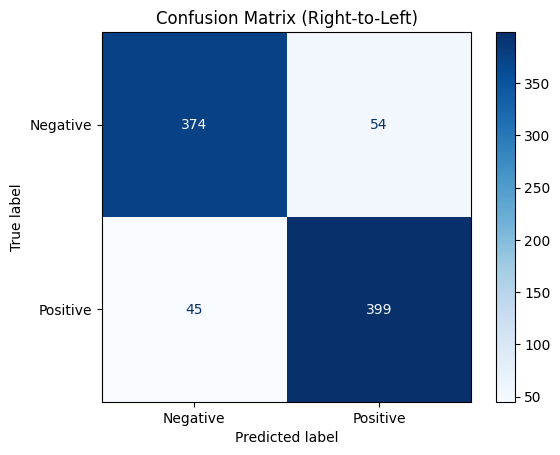

In [ ]:
all_labels = []
all_predictions = []

right_to_left_model.eval()
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        logits = right_to_left_model(input_ids=input_ids, attention_mask=attention_mask)

        predictions = torch.argmax(logits, dim=-1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

validation_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Validation Accuracy (Right-to-Left): {validation_accuracy:.4f}")

conf_matrix = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Right-to-Left)")
plt.show()

In [21]:
from transformers import BertForSequenceClassification, AutoTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

model_name = "textattack/bert-base-uncased-SST-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name).to(device)




In [18]:
max_token_id = max(
    max(batch["input_ids"].view(-1).tolist()) for batch in validation_dataloader
)
print(f"Maximum token ID in validation dataset: {max_token_id}")
print(f"Tokenizer vocabulary size: {tokenizer.vocab_size}")


Maximum token ID in validation dataset: 29667
Tokenizer vocabulary size: 30522


In [19]:
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True, max_length=128, padding="max_length")

tokenized_datasets = dataset.map(preprocess_function, batched=True, remove_columns=["sentence", "idx"])
tokenized_datasets.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

validation_dataloader = DataLoader(tokenized_datasets["validation"], batch_size=16)


Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [23]:
all_labels = []
all_predictions = []

model.eval()
with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        predictions = torch.argmax(logits, dim=-1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())




Zero-Shot Validation Accuracy (BERT): 0.9243


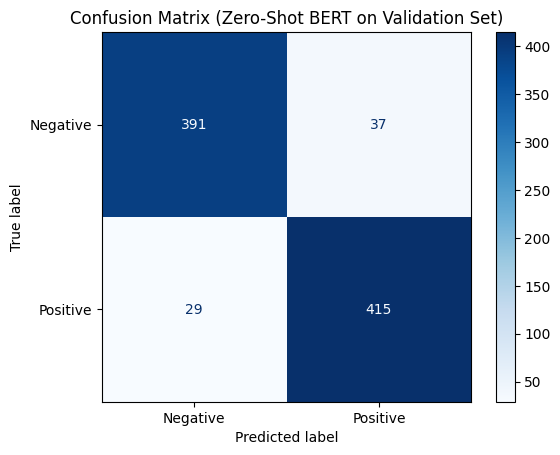

In [24]:
zero_shot_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Zero-Shot Validation Accuracy (BERT): {zero_shot_accuracy:.4f}")

conf_matrix = confusion_matrix(all_labels, all_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Zero-Shot BERT on Validation Set)")
plt.show()

---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**